<a href="https://colab.research.google.com/github/sarvesh23110076/CS203_Assign_3/blob/main/STT_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calculating Cohen's Kappa Score for the NLP Data**

In [ ]:
import pandas as pd
import json

In [ ]:
file_path_1='/content/project-1-at-2025-01-26-14-37-c4767f1a.csv'
file_path_2='/content/project-1-at-2025-01-26-15-37-e4b6efa3.csv'
df_1=pd.read_csv(file_path_1)
df_2=pd.read_csv(file_path_2)

In [ ]:
# Function to convert annotations to the desired format
def to_pos_tags(annotation_text):
      # Loading the annotations as a list of dictionaries
      annotations=json.loads(annotation_text)
      # Creating a list of words and their corresponding POS tags
      pos_tags=[{"word": annotation["text"], "entity": tag} for annotation in annotations for tag in annotation["labels"]]
      return pos_tags

In [ ]:
# Applying the conversion function to each row in the 'label' column
df_1['POS Tags']=df_1['label'].apply(to_pos_tags)
df_2['POS Tags']=df_2['label'].apply(to_pos_tags)

# Creating the final DataFrame with 'text' and 'POS Tags' columns
final_df_1=df_1[['text', 'POS Tags']]
final_df_2=df_2[['text', 'POS Tags']]

In [ ]:
final_df_1.head()

,text,POS Tags
0,डायरेक्टोरेट जनरल ऑफ सिविल एविएशन (DGCA) ने जे...,"[{'word': 'डायरेक्टोरेट', 'entity': 'NOUN'}, {..."
1,मीडिया रिपोर्ट्स के अनुसार देश के 5 म्यूचुअल फ...,"[{'word': 'रिपोर्ट्स', 'entity': 'NOUN'}, {'wo..."
2,रेलवे रिक्रूटमेंट बोर्ड (RRB) सोमवार यानी 16 अ...,"[{'word': 'रेलवे', 'entity': 'NOUN'}, {'word':..."
3,PLI स्कीम के दो हिस्से-चैंपियन ओरिजिनल इक्विपम...,"[{'word': 'PLI', 'entity': 'PROPN'}, {'word': ..."
4,इसमें अदाणी ग्रुप की FMCG कंपनी अदाणी विल्मर न...,"[{'word': 'इसमें', 'entity': 'PRON'}, {'word':..."


In [ ]:
final_df_2.head()

,text,POS Tags
0,डायरेक्टोरेट जनरल ऑफ सिविल एविएशन (DGCA) ने जे...,"[{'word': 'डायरेक्टोरेट', 'entity': 'NOUN'}, {..."
1,मीडिया रिपोर्ट्स के अनुसार देश के 5 म्यूचुअल फ...,"[{'word': 'रिपोर्ट्स', 'entity': 'NOUN'}, {'wo..."
2,रेलवे रिक्रूटमेंट बोर्ड (RRB) सोमवार यानी 16 अ...,"[{'word': 'रेलवे', 'entity': 'NOUN'}, {'word':..."
3,PLI स्कीम के दो हिस्से-चैंपियन ओरिजिनल इक्विपम...,"[{'word': 'PLI', 'entity': 'PROPN'}, {'word': ..."
4,इसमें अदाणी ग्रुप की FMCG कंपनी अदाणी विल्मर न...,"[{'word': 'इसमें', 'entity': 'PRON'}, {'word':..."


In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
# Function to extract POS tags (entities) from the 'POS Tags' column
def extract_pos_tags(df):
    labels=[]
    for pos_tags in df['POS Tags']:
        tags=[entry['entity'] for entry in pos_tags]
        labels.append(tags)
    return labels

# Extracting POS tags from both datasets
labels_1=extract_pos_tags(final_df_1)
labels_2=extract_pos_tags(final_df_2)

# Flattening the lists for comparison
flat_labels_1=[tag for sublist in labels_1 for tag in sublist]
flat_labels_2=[tag for sublist in labels_2 for tag in sublist]

# Calculating Cohen's Kappa score
kappa_score=cohen_kappa_score(flat_labels_1, flat_labels_2)
print(f"Cohen's Kappa Score: {kappa_score}")

Cohen's Kappa Score: 0.9145922445831288


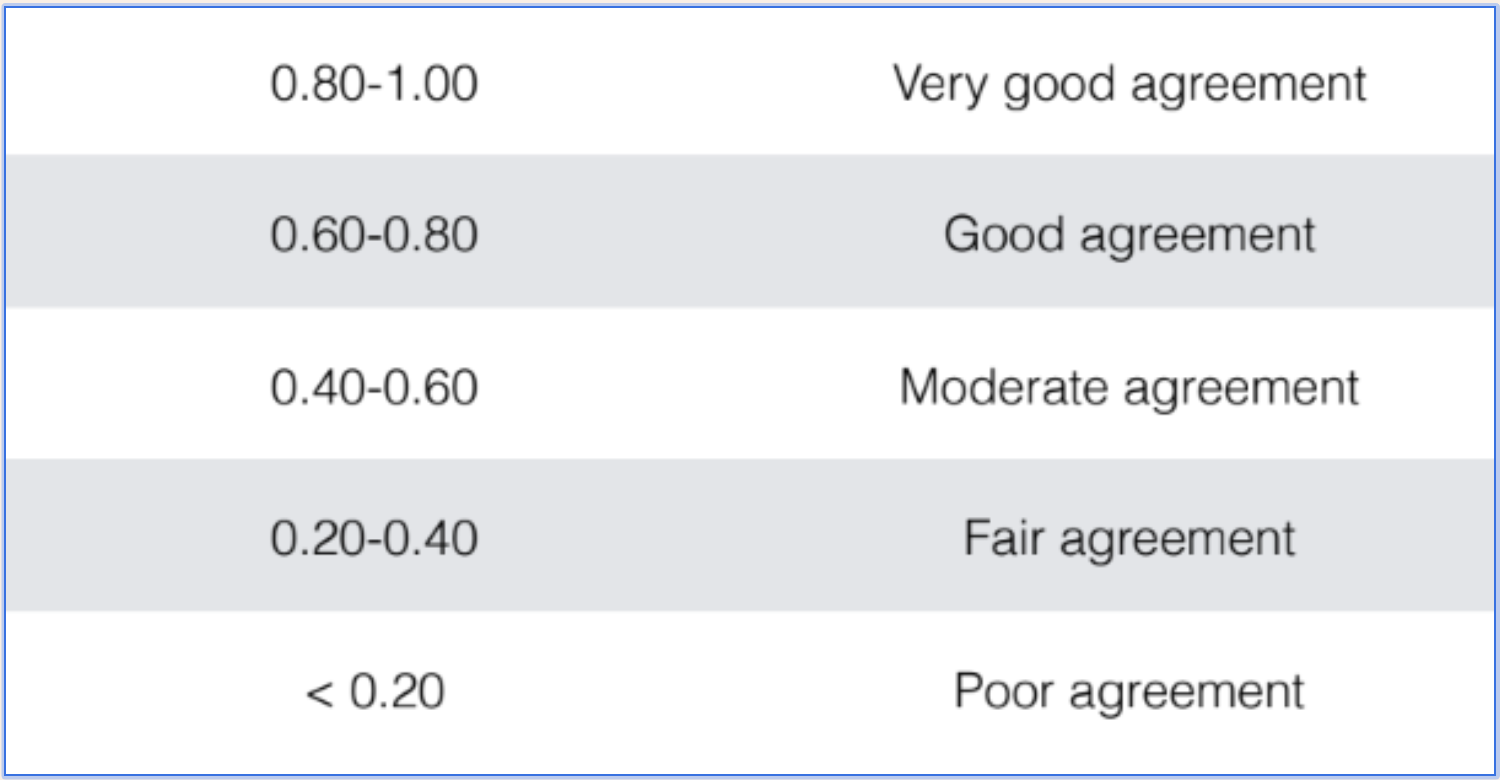

A Cohen's Kappa Score of 0.91 indicates a very strong agreement of classification among both of us. Thus, this data is highly reliable. Although using more annotators would give higher reliabilty and consistent. The small erros could have arisen due to misintepretations of different words among different categories as well as human errors while classifying.

# **Calculating Fleiss' Kappa Score for the CV Data**

In [ ]:
import pandas as pd

file_path_1='/content/project-5-at-2025-01-26-15-50-a9dc89e5.csv'
file_path_2='/content/project-5-at-2025-01-26-15-53-da165c50.csv'
file_path_3='/content/project-5-at-2025-01-26-15-58-ddf00733.csv'
df_1=pd.read_csv(file_path_1)
df_2=pd.read_csv(file_path_2)
df_3=pd.read_csv(file_path_3)

# Selecting only the 'id' and 'choice' columns for cleaner dataset
final_df_1=df_1[['id', 'choice']]
final_df_2=df_2[['id', 'choice']]
final_df_3=df_3[['id', 'choice']]

In [ ]:
final_df_1.head()

,id,choice
0,28839,Non-Truck
1,28840,Non-Truck
2,28841,Non-Truck
3,28842,Non-Truck
4,28843,Truck


In [ ]:
final_df_2.head()

,id,choice
0,28839,Non-Truck
1,28840,Non-Truck
2,28841,Truck
3,28842,Non-Truck
4,28843,Truck


In [ ]:
final_df_3.head()

,id,choice
0,28839,Non-Truck
1,28840,Non-Truck
2,28841,Non-Truck
3,28842,Non-Truck
4,28843,Truck


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

In [ ]:
file_path_1='/content/project-5-at-2025-01-26-15-50-a9dc89e5.csv'
file_path_2='/content/project-5-at-2025-01-26-15-53-da165c50.csv'
file_path_3='/content/project-5-at-2025-01-26-15-58-ddf00733.csv'
df_1=pd.read_csv(file_path_1)
df_2=pd.read_csv(file_path_2)
df_3=pd.read_csv(file_path_3)

# Selecting only the 'id' and 'choice' columns and renaming 'choice' to avoid column name conflicts
df_1=df_1[['id', 'choice']].rename(columns={'choice': 'choice_1'})
df_2=df_2[['id', 'choice']].rename(columns={'choice': 'choice_2'})
df_3=df_3[['id', 'choice']].rename(columns={'choice': 'choice_3'})

# Merging the data from all three annotators on 'id'
merged_df=df_1.merge(df_2, on='id').merge(df_3, on='id')

# Creating a list to store the counts for each item
labels=merged_df[['choice_1', 'choice_2', 'choice_3']].values

# Determining the unique choices (categories) across all annotators
choices=np.unique(labels)

# Creating the Fleiss' Kappa matrix
kappa_matrix=[]
for row in labels:
    row_counts=[np.sum(row==choice) for choice in choices]  # Counting occurrences of each choice
    kappa_matrix.append(row_counts)

# Converting the list to a NumPy array
kappa_matrix=np.array(kappa_matrix)

# Calculating Fleiss' Kappa score
fleiss_kappa_score=fleiss_kappa(kappa_matrix)
print(f"Fleiss' Kappa Score: {fleiss_kappa_score}")

Fleiss' Kappa Score: 0.8820512820512818


A Fleiss' Kappa Score of 0.88 indicates a highly level of agreement between us 3 annotators as well. Thus, this data is also highly reliable and consistent. The small disagreements could have arised due different interpretations of trucks by each of us as well as human error while observing and entering the data.